# Gas Drag on Moons in Synestias
Synestias can form moons. It is a natural consequence of the cooling process a synestia undergoes as the photosphere (where cloud cover is; where rock vapor condenses) radiates heat into the cold vacuum of space. There is a great deal of silicate vapor in the moon-forming region of a synestia, which provides a significant source of material with which to grow a moon.

Before a moon (on the order of 1,000 km) can coalesce out of a synestia, the smaller building blocks of a moon, <i>moonlets</i> ($>$ dm-size liquid condensates), must grow from <i>droplets</i>. Droplets are mm- and cm- size rain that condense out of the cooled vapor at the photosphere. Similarly, before a puddle can pool on Earth's surface, water vapor must condense in Earth's atmosphere and rain to the surface.

Once a parcel of gas from the synestia condenses into a liquid droplet, that parcel is no longer coupled to its fellow gas parcels. The surrounding vapor cannot support the condensate due to its higher density. The droplet loses pressure support from the surrounding gas and begins to fall towards the midplane (z = 0), pulled by gravitational forces. As the droplet falls, it passes through gas which imparts a drag on the droplet and causes the droplet to slow down and lose angular velocity. The orbit of the droplets will decay over time in accord with the strength of the gas drag acceleration.

Will this droplet make it to the midplane and help form a moonlet? Will this droplet re-vaporize? Or will this droplet be lost to the planet-like central region of the synestia? To answer this, we need to know how strong the gas drag force is. What affects the strength of gas drag?

## Gas Drag Equation

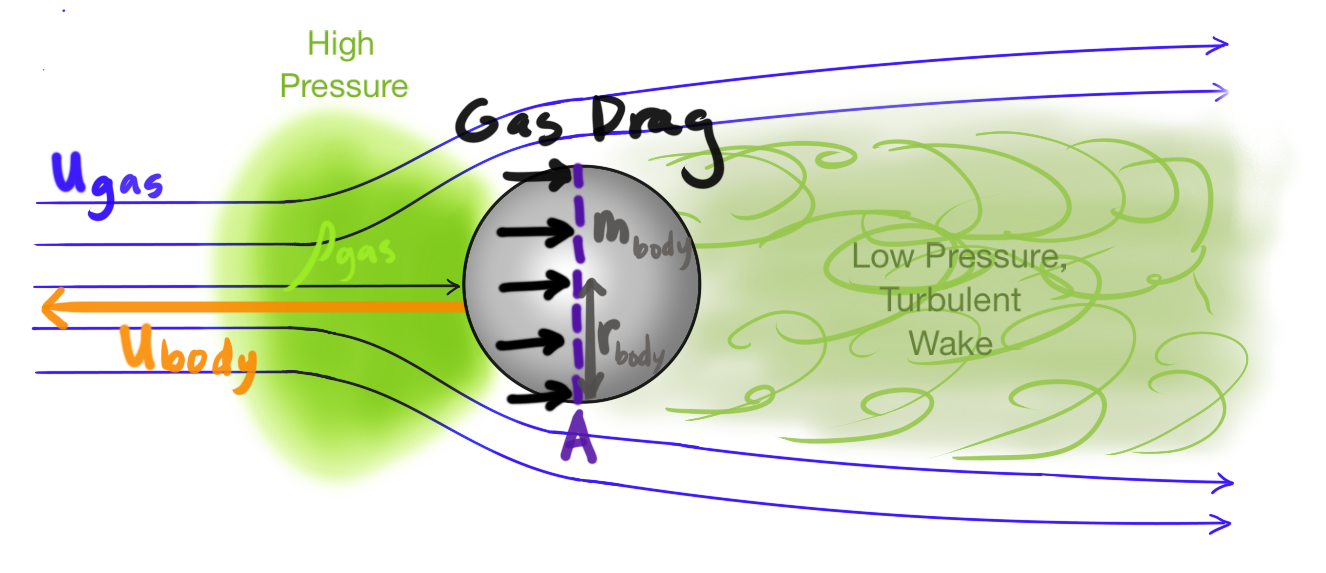

<i>Caption</i>. Gas drag acting on a sphere with a cross sectional area A of $\pi$r$_{body}^2$. The sphere has a mass m$_{body}$ and is moving with a velocity u$_{body}$ through a gas with density $\rho_{gas}$ moving at a velocity u$_{gas}$. As the sphere moves through the gas, gas particles will pile up in front of the sphere, creating a high pressure region. The gas drag that arises as a result of the velocity differential between the gas and sphere imparts an acceleration a$_{drag}$ on the sphere. Credit: G. O. Hollyday.

The magnitude of the gas drag acceleration can be estimated by assuming that the moonlets can experience simple gas drag due to laminar flow around a solid sphere. The equation for simple gas drag acceleration is as follows:

$$a_{drag}=\frac{C_D\ A \ \rho_{gas} \ (u_{gas} - u_{body})^2}{2 \ m_{body}}$$

Simple gas drag acceleration a$_{drag}$ is dependent on:
* the density $\rho_{gas}$ of the gas that drags a body of mass m$_{body}$,
* the cross sectional area A of the body that the gas is interacting with (typically we assume solar system bodies are spherical, so they would have a circular cross section),
* the gas drag coefficient C$_D$ (which depends on what thermal regime we are in), and
* the relative velocity between the gas and the body being dragged u$_{gas}$-u$_{body}$.

The relative velocity between the gas and a body is more important than how fast the body moves. If the body were traveling at the same speed and in the same direction as the gas surrounding it, it wouldn't matter how fast the body was traveling, there would be no gas drag acting on the body. The relative speed is what affects the magnitude of the gas drag the most. Think of the difference in velocity between a synestia's gas field and a moonlet as the headwind a moonlet must battle as it orbits within a synestia. If the gas and moonlet are moving in the same direction, but the gas is moving faster, the gas will help pull the moonlet along, much like how wind might push you from behind and help you run or move faster. If the gas and moonlet are moving in opposite directions, then the gas will slow the moonlet, much like how you might struggle to step or bicycle against a strong gust of a wind coming at you.

Test this as you interact with the figure below, which plots the gas drag acceleration for a number of relative velocities. Notice how each of the parameters ("Size of moonlet", "Gas drag coefficient", and "Gas density") affects the magnitude of the gas drag.

In [5]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is hidden by default for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [6]:
import numpy as np
import math
from ipywidgets import *
import matplotlib.pyplot as plt

vel_rel = np.linspace(0.0, 1000., 100) #relative velocity between gas and body in m/s
dens = 3000. #lunar density in kg/m3; 3.0 g/cc

def dragfunc(rad_body, C_D, dens_gas):
    #mass of body in kg; assume spherical body (and spherical cross section)
    mass_body = dens*(4./3.)*math.pi*(rad_body**3)
    #acceleration imparted on body due to gas drag in m/s^2
    a_drag = 0.5*C_D*math.pi*(rad_body**2)*dens_gas*(vel_rel**2)/mass_body
    plt.plot(vel_rel, a_drag)
    plt.xlabel('velocity of the gas relative to the velocity of the moonlet (m/s)')
    plt.ylabel('gas drag acceleration (m/s$^2$)')
    plt.show()
    plt.close()
   
#RELATIVE SCALE IN GENERAL: how big the moonlets are (marble, golf ball, grain of sand,
#yoga ball, soccer field, etc.), how fast the relative and absolute velocity is   
style = {'description_width': 'initial'}
layout = {'width': '400px'}
%matplotlib inline
interact(dragfunc,
         rad_body=FloatLogSlider(value=1, base=10, min=-3, max=6, step=1,
                                 description='Size of moonlet (m)', style=style, layout=layout),
         C_D=FloatSlider(value=2, min=0, max=2.5, step=0.5, description='Gas drag coefficient C$_D$ (-)',
                         continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         dens_gas=FloatLogSlider(value=1, base=10, min=-3, max=3, step=1,
                                 description='Gas density (kg/m$^3$)', style=style, layout=layout)
        )

#acceleration in terms of what we experience on Earth
accel_label=['on board space shuttle ISS','elevator headed up','gravitational pull on surface of Earth',
             'roller coaster launch','space shuttle launch, gravitron amusement ride','top of roller coaster loop',
             'maximum heavy braking on Formula One Car','maximum acceleration permitted on piloted planes',
             'hard slap to the face, car crash','shock capacity of mechanical wrist watch',
             'Mantis Shrimp claw strike','proton in Large Hadron Collider']
accel_g=['1e-6 g','0.2 g','1 g','1.5 g','3 g','5 g','6.3 g','10 g','100 g','5000 g','10400 g','1.9e8 g']
left_box0=widgets.VBox([widgets.Label(str(i)) for i in accel_label])
right_box0=widgets.VBox([widgets.Label(str(i)) for i in accel_g])

#velocity in terms of what we experience on Earth
vel_label=['Walking','Biking','Usain Bolt sprinting','Train','Car moving 100 mph (160 km/h)',
           'Helicopter','Commerical airplane','Speed of sound in air (sound barrier)']
vel_ms=['1.5 m/s','4.5 m/s','12.5 m/s','27 m/s','45 m/s','70 m/s','220 m/s','343 m/s']
left_box1=widgets.VBox([widgets.Label(str(i)) for i in vel_label])
right_box1=widgets.VBox([widgets.Label(str(i)) for i in vel_ms])

widgets.HBox([left_box0,right_box0,left_box1,right_box1])

interactive(children=(FloatLogSlider(value=1.0, description='Size of moonlet (m)', layout=Layout(width='400px'…

<i>Caption</i>. Comparison of gas drag acceleration on various sized bodies for same surrounding gas. The gas drag acceleration is plotted in units of m/s$^2$ against the relative velocity in m/s.  For a more intuitive idea of how strong these accelerations are, or how fast these speeds are, there is also a list of different accelerations and speeds that you may encounter just below the plot above. The accelerations are given in terms of 'g' where 1 g = 9.8 m/s$^2$ (i.e. 1 g is the gravitational acceleration here on the surface of Earth). To the right of the accelerations is a second list of various speeds in m/s to calibrate against the relative velocity between the droplet at the gas.

For the same gas field, gas drag acceleration is greater when the mass of the moonlet is smaller and the gas drag coefficient and relative velocity are larger. Gas drag will be stronger in a denser gas field.

## Decaying Orbits: Moonlets Dragged by Gas in a Synestia
We would like to understand how gas drag affects how a single moonlet travels through the vapor in a synestia.

In order to form a moon, moonlets must survive long enough to collide and grow into a body that is large enough to not be heavily affected by gas drag and will remain in orbit within the synestia without breaking apart from gravitational forces. Otherwise, the masses of the moonlets will be added to the center of a synestia (extends to about 10,000 km for the example Earth-mass synestia in the plot below) and lost from the moon-forming region of a synestia (about $>$ 20,000 km for the example Earth-mass synestia in the plot below). Moons are formed in the midplane, because they grow from colliding with other moonlets that reach the midplane. In the interactive below, you will see how the gas drag significantly decays and circularizes the orbit of a moonlet over time.

Which scenarios result in the shortest decay times?

In potential Moon-forming synestias, the gas drag coefficient is 2 and this has been set for you; changing the coefficient has a relatively minimal effect on the gas drag magnitude anyways. The velocity of the moonlet and the surrounding gas and the gas density gradient is calculated according to what is expected in a typical Moon-forming synestia.

You will be able to choose where (in xyz) to initialize the moonlet. Where you initialize a moonlet indicates where that moonlet condensed from the vapor in a synestia. You can control the size of the moonlets, though it is more likely for smaller mass moonlets (roughly cm-sized) to form at the photosphere (z $>$ 10,000,000 m) and for moonlets in the midplane (z = 0) to be more massive (due to the addition of moonlets raining from the photosphere). Note that the moonlet's starting cylindrical radius will default to at least 20,000,000 m (starting x and y can't both be zero).

<i>Note</i>: The interactive below is not run in real time (i.e. it doesn't update as you change the slider bars / drop-down menu). To start the interactive, click on the "Run Interact" button. You may have to be patient while the plots load. There is a blue progress bar located under the "Run Interact" button to indicate your place in the gas drag calculation. The gas drag calculation can be lengthy. If the notebook does not respond after 5 minutes, restart the notebook. If you are struggling to produce a plot in a reasonable amount of time, try these four scenarios:
1. 230 story building, x = 20,000,000 m, y = 20,000,000 m, and z = 0 m
2. 230 story building, x = 20,000,000 m, y = 20,000,000 m, and z = 0 m
3. The Moon, x = 20,000,000 m, y = 20,000,000 m, and z = 15,000,000 m
4. Cow, x = 20,000,000 m, y = 20,000,000 m, and z = 0 m

In [2]:
HTML('''The raw code for this IPython notebook is hidden by default for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [12]:
import math
import numpy as np
import rebound
import matplotlib.pyplot as plt
from IPython.display import clear_output

Mass_syn=5e24 #Earth mass synestia in kg
dens=3000. #density of moonlet kg/m3
G_hr=(6.674e-11)*(3600**2) #gravitational constant converted to m^3 kg^-1 hr^-2
const1=10.55#10.55#10 to 11
const2=0.86#0.86#0.85 to 0.9
const3=0.9e35#0.9e35 #1e33 to 1e37
const4=-4.7#-4.7 #-4.5 to -5

def pltdrag(r0,x0,y0,z0):
    clear_output(wait=True)
    f = FloatProgress(min=0, max=100) # instantiate the bar
    display(f) # display the bar
    m0=4.*math.pi*dens*(r0**3)/3. #mass of moonlet in kg
    s0=(x0**2 + y0**2)**0.5 #initial moonlet distance from rotational axis in m
    v_gas=0.95*(G_hr*Mass_syn/s0)**0.5 #sub-Keplerian gas velocity m/hr #0.01*(10.**(0.15599001870969695*np.log10(s0) - 1.6401471197424731))*((G_hr*Mass_syn/s0)**0.5)
    vx0=-v_gas*y0/s0 #x-component of sub-Keplerian gas velocity m/hr
    vy0=v_gas*x0/s0 #y-component of sub-Keplerian gas velocity m/hr

    #intialize orbit simulation
    sim_drag = rebound.Simulation() #start simulation
    sim_drag.units = ('Hr', 'M', 'Kg') #use SI units, seconds not available
    sim_drag.add(m=Mass_syn) #add central body: Earth mass synestia
    sim_drag.add(m=m0,r=r0) #add moonlet to simulation
    ps_drag = sim_drag.particles #initialize particle class (holds xyz position information)
    ps_drag[1].x=x0 #set initial x position of moonlet in m
    ps_drag[1].y=y0 #set initial y position of moonlet in m
    ps_drag[1].z=z0 #set initial z position of moonlet in m
    ps_drag[1].vx=vx0 #set initial x velocity of moonlet in m/hr #intial velocities will be same as gas
    ps_drag[1].vy=vy0 #set initial y velocity of moonlet in m/hr
    ps_drag[1].vz=0 #set initial z velocity of moonlet in m/hr #assume gas is not moving in z
    sim_drag.integrator = "ias15"#"whfast"#"leapfrog"#symplectic integrator #"ias15" #default integrator; adaptive time-stepping
    sim_drag.min_dt=0.001 #make sure doesn't pick too small of a time step
    sim_drag.dt=0.001 #start with this time step
    f.value += 5

    #define gas drag acceleration
    def drag(sim_drag):
        #drag coefficient is 2 in potential Moon-forming synestias
        ps_x = ps_drag[1].x
        ps_y = ps_drag[1].y
        ps_z = ps_drag[1].z
        ps_vx = ps_drag[1].vx
        ps_vy = ps_drag[1].vy
        ps_vz = ps_drag[1].vz
        s=np.sqrt(ps_x**2 + ps_y**2) #cylindrical radius of moonlet in m
        z_s=const1*(s**const2) #scale height fit in m
        rho_g=const3*(s**const4)*np.exp(-(ps_z/z_s)**2) #gas density fit in kg/m^3
        v_g=0.95*np.sqrt(G_hr*Mass_syn/s) #sub-Keplerian gas velocity in m/hr #(10.**(0.15599001870969695*np.log10(s) - 1.6401471197424731))*((reb_sim.G*Mass_syn/s)**0.5)
        theta=np.arctan(ps_y/ps_x)
        v_gx=-np.abs(v_g*np.sin(theta))*np.sign(ps_y) #x component of gas velocity in m/hr
        v_gy=np.abs(v_g*np.cos(theta))*np.sign(ps_x) #y component of gas velocity in m/hr
        #assumption: speed of gas in z, v_gz, will be zero for synestia in hydrostatic equilibrium
        v_rel_x=ps_vx - v_gx
        v_rel_y=ps_vy - v_gy
        v_rel=np.sqrt(v_rel_x**2 + v_rel_y**2 + ps_vz**2)
        factor = math.pi*(ps_drag[1].r**2)*rho_g*v_rel/ps_drag[1].m #common factor for gas drag in components
        ps_drag[1].ax += -factor*v_rel_x
        ps_drag[1].ay += -factor*v_rel_y
        ps_drag[1].az += -factor*ps_vz

    #tell simulation to add gas drag and update velocities with each time step
    sim_drag.additional_forces = drag
    sim_drag.force_is_velocity_dependent = 1
    sim_drag.move_to_com() #move to center of mass (central body is at origin)

    Noutputs = 2000 #increase this to get a smoother curve for orbit
    if r0 < 10:
        times = np.linspace(0.,600., Noutputs)
    elif r0 > 1e4:
        times = np.linspace(0.,600., Noutputs)
    else:
        times = np.linspace(0.,200., Noutputs) #times to output position information of particle

    #intialize holder arrays for positional output from simulation
    xholder = np.zeros(Noutputs)
    yholder = np.zeros(Noutputs)
    zholder = np.zeros(Noutputs)
    sholder = np.zeros(Noutputs)
    f.value += 5
    fstep = 81./len(times)
    for k,time in enumerate(times):
        sim_drag.integrate(time)
        xtemp = ps_drag[1].x
        ytemp = ps_drag[1].y
        stemp = np.sqrt(xtemp**2 + ytemp**2)
        f.value += fstep
        if stemp <= 10e6:
            #exit out of simulation when reach the inner region (10,000,000 m)
            #shorten arrays to exclude zeros at end
            xholder = xholder[:k]
            yholder = yholder[:k]
            zholder = zholder[:k]
            sholder = sholder[:k]
            times = times[:k]
            f.value = 91
            print('The length of time the moonlet spends in the disk-like region is {0:.1f} hr.'.format(times[-1]))
            break
        else:
            xholder[k] = xtemp  # This stores the data which allows us to plot it later
            yholder[k] = ytemp
            zholder[k] = ps_drag[1].z
            sholder[k] = stemp
    if sholder[-1] > 11e6:
        print('The moonlet remains in the disk-like region at {0:.1f} hr.'.format(times[-1]))
    xholder = xholder*(1e-3)
    yholder = yholder*(1e-3)
    zholder = zholder*(1e-3)
    sholder = sholder*(1e-3)
    rholder = np.sqrt(sholder**2 + zholder**2)
    ymax=np.amax(rholder)

    #plot
    fig = plt.figure(figsize=(18,4))
    ax = plt.subplot(131)
    plt.plot(xholder, yholder)
    plt.plot(x0/1e3,y0/1e3,'x',markersize=10)
    plt.plot(0,0,'k*')
    plt.plot(xholder[-1], yholder[-1],'o')
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.ylim([-ymax,ymax])
    plt.xlim([-ymax,ymax])
    ax.set_aspect(1)
    
    f.value += 3

    ax2 = plt.subplot(132)
    plt.plot(sholder, zholder)
    plt.plot(s0/1e3,z0/1e3,'x',markersize=10)
    plt.plot(0,0,'k*')
    plt.plot(sholder[-1], zholder[-1],'o')
    plt.xlabel('distance to rotational axis r$_{xy}$ (km)')
    plt.ylabel('vertical distance off midplane z (km)')
    plt.ylim([-ymax,ymax])
    plt.xlim(xmin=0)
    ax2.axis('equal')

    f.value += 3
    
    ax3 = plt.subplot(133)
    plt.plot(times,rholder)
    plt.plot(0,rholder[0],'x',markersize=10)
    plt.plot(times[-1],rholder[-1],'o')
    plt.xlabel('time (hr)')
    plt.ylabel('radius r (km)')
    plt.show()
    plt.close()
    
    f.value += 3

    
x0slider = FloatSlider(value=20e6, min=0, max=60e6, step=20e6, description='x starting position of moon (m)',
                         continuous_update=False, readout=True, readout_format='.0f', style=style, layout=layout)
y0slider = FloatSlider(value=20e6, min=0, max=60e6, step=20e6, description='y starting position of moon (m)',
                         continuous_update=False, readout=True, readout_format='.0f', style=style, layout=layout)

def rxy_min_x0(*args):
    rxy0 = np.sqrt(x0slider.value**2 + y0slider.value**2)
    if x0slider.value < 20e6:
        y0slider.value = 20e6

def rxy_min_y0(*args):
    rxy0 = np.sqrt(x0slider.value**2 + y0slider.value**2)
    if y0slider.value < 20e6:
        x0slider.value = 20e6
    
x0slider.observe(rxy_min_x0, 'value')
y0slider.observe(rxy_min_y0, 'value')
interact_manual(pltdrag,
         r0=widgets.Dropdown(
             options=[('Coarse sand (mm)', 1.e-3),
                      ('Diameter of a belly button (cm)', 1.e-2),
                      ('Coconut (dm)', 0.1),
                      ('Cow (m)', 1.),
                      ('230 story building (km)', 1.e3),
                      ('Width of the United States (Mm)', 1.e6),
                      ('The Moon (3.5 Mm)', 3.5e6)],
             value=1.e3, description='Size (diameter) of moonlet:', continuous_update=False, style=style),
         x0=x0slider,
         y0=y0slider,
         z0=FloatSlider(value=0, min=0, max=30e6, step=5e6, description='z starting position of moon (m)',
                         continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
    )

interactive(children=(Dropdown(description='Size (diameter) of moonlet:', index=4, options=(('Coarse sand (mm)…

<function __main__.pltdrag(r0, x0, y0, z0)>

<i>Caption</i>. The effect of gas drag acceleration on the orbit of various sized spherical bodies for the same surrounding varying-density gas. The simulation ends when, during any point in the condensate's orbit, the condensate's distance from the rotational axis reaches the planet-like region, which is r = 10,000 km in this case. The time it takes the moonlet to reach this distance is called the decay time. For bodies initialized off the midplane, the particle oscillates a bit around the midplane as it settles into gravitational equilibrium. The particle overshoots the midplane a little initially because it cannot slow down immediately at the midplane, loses speed as it turns back around but gains a little speed as it gets accelerated back up towards the midplane, and so on, until there is no movement in z.

You may have noticed in the interactive above that a condensate decays more quickly when:
1. the gas field of a synestia is denser,
2. a condensate forms in the midplane (z = 0) as opposed to in the photosphere (high z),
3. and a condensate accretes closer to the center of a synestia.

Why is this?

### 1. Gas Drag Acceleration Increases with Gas Field Density

The balance of forces changes for a condensate:

$$\omega^2r = \frac{GM}{r^2}\left(1 + \frac{3J_2a_{eq}^2}{2r^2}\left(\frac{5z^2}{r^2} - 1\right)\right) + a_{drag}$$

where the gas slows down the condensate instead of supporting it. The denser the gas field surrounding the condensate, the stronger the gas drag acceleration that pulls on the condensate and the quicker the angular velocity of the condensate decreases. As a consequence, the angular velocity deficit between the condensate and the equivalent Keplerian orbit is greater, and the condensate's orbit decays more rapidly.

### 2. Gravity Off the Midplane Tempers Gas Drag Acceleration

Net accelerations imparted on a droplet by gas drag and gravity continuously change as the droplet travels in a synestia.

When a droplet condenses out of a synestia near the photosphere, it loses pressure support, but will initially have the same velocity as the gas around it. The gas is moving at just below Keplerian velocities in r$_{xy}$ = (x, y) with zero velocity in z. At the start, the moonlet experiences very little gas drag and is being pulled towards the midplane (z = 0) by gravity, no longer balanced by gas pressure in z.

As gravity accelerates the moonlet towards the midplane, this creates a large velocity differential between the gas (zero velocity in z) and the moonlet. As gas drag begins to act in z, the particle slows in its descent to the midplane. Simultaneously, gravity in r$_{xy}$ will move the droplet to a smaller r$_{xy}$ on a Keplerian orbit. However, gas drag will slow this inward motion.

Gas drag perturbs the moonlet's orbit, resulting in an elliptical, or eccentric, orbit. This temporarily prevents inward spiraling of the particle since the elliptical orbit moves the moonlet away from the center of its synestia. The higher off the midplane, the more elliptical the orbit. The farther the elliptical orbit moves the droplet, the slower the inward decay of the droplet.

### 3. Greater Distance from Rotational Axis Allows More Orbital Travel Time

The farther away from the rotational axis the particle condenses and begins its orbital decay, the slower the particle decays.

As a condensate decays due to gas drag, the condensate will approach the central body closely on one side of the orbit (<i>nearest approach</i>). The location of the condensate's nearest approach will travel closer to the central body with time. If a moonlet travels close enough to the central body, it will become a part of the interior (planet-like center) of a synestia.

The greater the distance between the condensate and the planet-like region, the greater the distance the condensate can travel before entering the planet-like region of a synestia. This is a given, but it takes a longer time to travel a larger distance. If the condensate initializes at a greater distance from the center of a synestia, then the longer it will take for the condensate to spiral inwards and decay.

### Orbital Decay Time Dependence on Mass

Gas drag has a smaller effect on large particles (it is difficult to change their motion due to their large mass) and small particles (very little surface area for the gas to exert drag on). Very small droplets and very large moonlets survive the longest in the interior of a synestia, whereas medium-sized particles decay the quickest. Droplets and moonlets that decay more rapidly than they can grow will spiral into the planet-like center of a synestia.

Based on the fastest accretion time for the Moon in cooling simulations of Earth-mass synestias, the minimum time in which a Moon-mass could grow is about 10 years (87,600 hrs) ([Lock et al., 2018](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017JE005333)). Compared to this, for orbits (calculated by the interactive above) that begin in the midplane close to the central body, a single 1-km-sized moonlet could survive 10's of hours, which is the fastest decay time of all the moonlet and droplet sizes. In contrast, the quickest decay times (calculated by the interactive plot above) for a meter-sized moonlet and a Moon-sized moonlet are at least several orders of magnitude longer.

The quick decay of km-sized moonlets is a barrier for lunar growth within a synestia. As smaller moonlets reach km-scale, they must grow quickly to enter a size regime where the gas won't decay the moonlet's orbit as quickly.

#### Continually Growing Masses

It is important to note that a single moonlet within a synestia is not alone. There are many droplets condensing out of the photosphere at once, which creates a nearly continuous torrential downpour of rock rain as the synestia cools. These droplets will collide with one another and grow, increasing their mass. If the droplets grow large enough, they become moonlets. As the moonlets fall to the midplane, they also accrete surrounding droplets and moonlets. Once droplets and moonlets reach the midplane, they can accrete to other material in the midplane, and therefore slow their decay. How quickly the droplets and moonlets combine into larger masses relative to the decay of their orbits via gas drag is what will dictate whether, ultimately, the moon could survive.

#### Survival of the Moon Depends on the Growth of the Lunar Seed

In the stages just after the giant impact that forms a synestia, material in the midplane either quickly binds together via gravitational clumping or was part of the impacting bodies and didn't fully melt or vaporize, and acts as a <i>lunar seed</i> for droplets and moonlets to hold onto as they spiral past. The lunar seed acts as the core of the moon and scoops up droplets and moonlets within reach (under the moon's gravitational influence). The lunar seed must survive until the gas in a synestia disappears. The larger the mass of the lunar seed, the slower its orbit will decay due to gas drag. Orbital decay of droplets and mooonlets can help grow the moon (lunar seed), depending on where a given droplet or moonlet is in relation to the lunar seed.

#### Comparison with Canonical Model

In a canonical (planet-disk) Moon-forming case, the characteristic moonlet size that forms via spontaneous gravitational clumping of material in the disk is 10 km ([Salmon & Canup, 2012](https://iopscience.iop.org/article/10.1088/0004-637X/760/1/83/meta)). In a gas regime such as the one seen in the interactive above, these 10-km clumps would not last very long in a synestia (10's of hours). However, according to moon-forming simulations of the canonical case, these same sized moonlets would survive despite their short gas drag decay timescales, because they accrete quickly onto the lunar seed as they spiral in towards the planet ([Thompson & Stevenson, 1988](https://authors.library.caltech.edu/39035/)). Without a lunar seed, moonlets would not survive very long.

### Vaporization of Droplets May Slow Their Decay But Decrease Mass that Feeds Lunar Seed

There is another factor as well. As a droplet descends into a synestia, the temperature and pressure of the gas surrounding the droplet will increase, with maximum temperature and pressure values at the midplane. A droplet must combat vaporization in order to provide liquid material for the moon to grow from. The good news is that if a droplet vaporizes, its decay ceases as it buoys up towards the photosphere and remains in the moon-forming region of a synestia. This is a bit more complicated considering there are interactions with other droplets occurring, which may involve <i>thermal buffering</i> (some droplets at lower z act as shields and provide temperature buffers for the droplets behind them at greater z). However, if the mass of condensed material reaching the midplane is less due to vaporization of droplets, then less material accretes to the lunar seed at any given time. The lunar seed may decay more quickly if this is true. I will not explore the effects of vaporization here, but keep it in mind as you evaluate the decay times in the interactive figure above.

To access the next Jupyter Notebook (<i>Orbital Dynamics Within Synestias</i>), click [here](07Orbital_Dynamics_Within_Synestias.ipynb).

## References

Lock, S. J., Stewart, S. T., Petaev, M. I., Leinhardt, Z. M., Mace, M. T., Jacobsen, S. B., & Ćuk, M. (2018). The origin of the Moon within a terrestrial synestia. <i>Journal of Geophysical Research: Planets (American Geophysical Union)</i>, 123 (4), 910-951.

Salmon, J., & Canup, R. M. (2012). Lunar accretion from a Roche-interior fluid disk. <i>The Astrophysical Journal</i>, 760 (83), 1-18.

Thompson, C., & Stevenson, D. J. (1988). Gravitational instability in two-phase disks and the origin of the Moon. <i>The Astrophysical Journal</i>, 333 (1), 452-481.